# **Analyzing Terry Stops and Arrest Decisions: A Data-Driven Approach**

Law enforcement agencies face the challenge of balancing public safety with individual rights during Terry Stops. These brief investigative detentions, often based on reasonable suspicion, can lead to biased profiling, unnecessary arrests, and erosion of community trust. To address these issues, law enforcement agencies, community organizations, and policymakers can work towards more equitable policing practices and enhance community trust by implementing  strategies that minimize bias, uphold legal standards, and maximize the effectiveness of these encounters.

# **BUSINESS PROBLEM**<u>


#### **Overview**
The primary objective is to analyze police stop data to identify patterns related to racial profiling, stop resolutions, and the effectiveness of police interventions. This analysis can inform policy changes as well  improve community relations.


**Key Questions**:

-inquiry into whether race (of officer or of subject) plays a role in whether or not an arrest is made

-Are there disparities in stop rates among different racial or ethnic groups?

-What are the common reasons for stops, and how do they correlate with outcomes?

-How effective are the stops in terms of arrests or resolutions?

---

### **Challenges**
1. **Resource Inefficiency**:
 -Understanding the frequency and types of stops can help police departments allocate resources more effectively to address community safety concerns without bias.

2. **Potential Bias**:
   - Disproportionate impacts on certain racial or demographic groups.
   - Public distrust due to perceived or real biases in stop outcomes.

3. **Data Limitations**:
   - Incomplete or noisy data on stops, arrests, and contextual factors.
   - Challenges in integrating diverse data sources like time, location, and officer information.

4. **Legal and Ethical Concerns**:
   - Risk of reinforcing existing biases through model predictions.
   - Transparency issues when using machine learning models in sensitive areas.

---

### **Problem Statement**
How can police departments optimize resource allocation and improve fairness in Terry Stops by predicting arrest likelihood while addressing potential biases and ethical concerns?

---

### **Proposed Solution**
#### **Analysis**:
1. **Exploratory Data Analysis (EDA)**:
   - We will assess the arrest rates across different demographic groups, time of day, and presence of weapons.
   - As well as Identify patterns in stop outcomes to understand resource usage inefficiencies.

2. **Bias and Fairness Analysis**:
   - Measure disparate impact across racial and gender groups.
   - Test for systemic biases using fairness-aware metrics.

#### **Machine Learning Implementation**:
1. **Model Development**:
   - Train a classification model in order to predict the likelihood of arrest.
   - Use features like time of day, presence of weapons, gender, race, and location of the stop.

2. **Ethical Safeguards**:
   - Exclude or de-emphasize sensitive variables to mitigate bias.
   - Post-modeling bias detection using fairness-aware tools.

3. **Optimization**:
   - Recommend resource prioritization based on high-confidence predictions.
   - Implement real-time dashboards to guide officers on resource allocation.

4. **Validation**:
   - Evaluate model performance using metrics like ROC-AUC, precision, recall, and fairness scores.
   - Perform stress-testing under varying scenarios to ensure robustness.

---

### **Conclusion**
The implementation of a functional  model can enhance the efficiency of police resource allocation during Terry Stops. By incorporating fairness-aware approaches and ethical safeguards, this solution can also address biases and build public trust. The project highlights the importance of transparency and responsible AI practices in law enforcement.



# **DATA UNDERSTANDING**
***

The dataset derived from the Terry v. Ohio case would likely contain several features related to the Terry Stops (police stops based on reasonable suspicion) and the arrest outcomes. Understanding the dataset is a critical first step Zin building an our effective machine learning model. 




# **DATA PREPARATION**

First we import neccesacy libraries that help in preparation of data

In [1]:
import pandas as pd, numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Next is checking the information on the data set to see what we will use in order to deal wth the data properly

In [2]:
#This is to show open our data set as well as get an overview
df_terry_stops= pd.read_csv("C:\\Users\\PRECIOUS\\Desktop\\phase_3\\project\\Terry_Stops_20241201.csv")
df_terry_stops.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,1 - 17,-1,20170000167029,264811,Offense Report,None,6783,1976,M,White,...,15:13:00.0000000,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - FIGHT,911,EAST PCT 2ND W - GEORGE - PLATOON 2,N,N,West,K,K3
1,26 - 35,-1,20160000000367,122750,Field Contact,None,6907,1979,M,White,...,16:29:00.0000000,-,-,-,SOUTH PCT OPS - NIGHT ACT,N,N,-,-,-
2,18 - 25,-1,20160000002097,156305,Field Contact,None,7492,1983,M,White,...,01:54:00.0000000,-,-,-,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,-,-,-
3,46 - 55,-1,20160000002085,156051,Field Contact,None,7652,1985,M,Black or African American,...,05:50:00.0000000,-,-,-,WEST PCT 1ST W - KQ/DM RELIEF,N,N,South,R,R3
4,26 - 35,-1,20160000270653,179111,Offense Report,Lethal Cutting Instrument,5987,1967,M,White,...,14:52:00.0000000,ASLT - CRITICAL (NO SHOOTINGS),--CRISIS COMPLAINT - GENERAL,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,B,B1


The specified variables that will help in our analysis soas to get a bigger picture include :
**Officer Race ,
Officer Gender,
Weapons Type ,
Stop Resolution,
Age of Suspect,
Precinct,
Officer ID,
Terry Stop ID,
Time of Day (extracted from Reported Time),
initial call, 
final call**

In [3]:
print(df_terry_stops.columns)#to list the columns in our data set

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


In [4]:
print(df_terry_stops.shape) #To show shape of our ata set


(61998, 23)


In [5]:
# Checking data types and non-null counts
print(df_terry_stops.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61998 entries, 0 to 61997
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         61998 non-null  object
 1   Subject ID                61998 non-null  int64 
 2   GO / SC Num               61998 non-null  int64 
 3   Terry Stop ID             61998 non-null  int64 
 4   Stop Resolution           61998 non-null  object
 5   Weapon Type               61998 non-null  object
 6   Officer ID                61998 non-null  object
 7   Officer YOB               61998 non-null  int64 
 8   Officer Gender            61998 non-null  object
 9   Officer Race              61998 non-null  object
 10  Subject Perceived Race    61998 non-null  object
 11  Subject Perceived Gender  61998 non-null  object
 12  Reported Date             61998 non-null  object
 13  Reported Time             61998 non-null  object
 14  Initial Call Type     

 **Identify and handle outliers in numerical columns like Subject Age Group which shows as an object rather than an integer.
 This will help in knowng specific age groups which had the most arrests occur**

In [6]:
print(df_terry_stops['Subject Age Group'].unique())#To display unique values 


['1 - 17' '26 - 35' '18 - 25' '46 - 55' '36 - 45' '-' '56 and Above']


In [7]:
import re

# Extract the first number in each value (since it's in a range format)
df_terry_stops['Subject Age Group'] = df_terry_stops['Subject Age Group'].apply(
    lambda x: int(re.search(r'\d+', x).group()) if isinstance(x, str) and re.search(r'\d+', x) else None
)


In [8]:
df_terry_stops['Subject Age Group'].fillna(-1, inplace=True)  # Replace with -1 or another default


In [9]:
#Now we check on our data type again to see the changes made peak at how its now int32
df_terry_stops['Subject Age Group'] = df_terry_stops['Subject Age Group'].astype(int)


print(df_terry_stops.dtypes)

Subject Age Group            int32
Subject ID                   int64
GO / SC Num                  int64
Terry Stop ID                int64
Stop Resolution             object
Weapon Type                 object
Officer ID                  object
Officer YOB                  int64
Officer Gender              object
Officer Race                object
Subject Perceived Race      object
Subject Perceived Gender    object
Reported Date               object
Reported Time               object
Initial Call Type           object
Final Call Type             object
Call Type                   object
Officer Squad               object
Arrest Flag                 object
Frisk Flag                  object
Precinct                    object
Sector                      object
Beat                        object
dtype: object


In [10]:
print(df_terry_stops.columns)


Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')


**Then we derive the time of day as of when these arrests occur. This helps us in identifying at what point  in the time of day were the Terry stops at its peak**

In [11]:
# Define a function to categorize time of day
import pandas as pd


# Convert 'Reported Time' to datetime
df_terry_stops['Reported Time'] = pd.to_datetime(df_terry_stops['Reported Time'], errors='coerce')

# Define a function to categorize time of day
def categorize_time_of_day(time):
    if time.hour >= 5 and time.hour < 12:
        return 'Morning'
    elif time.hour >= 12 and time.hour < 17:
        return 'Afternoon'
    elif time.hour >= 17 and time.hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column
df_terry_stops['Time of Day'] = df_terry_stops['Reported Time'].apply(categorize_time_of_day)

# Count occurrences of each category
time_of_day_counts = df_terry_stops['Time of Day'].value_counts()
print(time_of_day_counts)

Night        23313
Morning      13844
Afternoon    12743
Evening      12098
Name: Time of Day, dtype: int64


In [12]:
# Fill missing values with 0
df_terry_stops['Subject Age Group'].fillna(0, inplace=True)

# Remove rows with missing values
df_terry_stops.dropna(inplace=True)

**Now we deal with categorical  variables**

In [13]:
# Group by Officer Race and Stop Resolution to count arrests
arrest_counts = df_terry_stops.groupby(['Officer Race', 'Stop Resolution']).size().unstack(fill_value=0)
print (arrest_counts)

Stop Resolution                            Arrest  Citation / Infraction  \
Officer Race                                                               
American Indian or Alaska Native               57                      0   
Asian                                         726                      7   
Black or African American                     512                     12   
Declined to Answer                            683                     16   
Hispanic                                      960                     20   
Native Hawaiian or Other Pacific Islander     115                      2   
Two or More Races                            1083                     18   
Unknown                                        10                      0   
White                                       10749                    143   

Stop Resolution                            Field Contact  Offense Report  \
Officer Race                                                               
American In

In [14]:
#This is to strip the whitespace from column names
df_terry_stops.columns = df_terry_stops.columns.str.strip()

In [15]:

# Extracting hour for the time of day
df_terry_stops["Reported Time"] = pd.to_datetime(df_terry_stops["Reported Time"])
df_terry_stops["Time of Day"] = df_terry_stops["Reported Time"].dt.hour

print(df_terry_stops.head())

   Subject Age Group  Subject ID     GO / SC Num  Terry Stop ID  \
0                  1          -1  20170000167029         264811   
1                 26          -1  20160000000367         122750   
2                 18          -1  20160000002097         156305   
3                 46          -1  20160000002085         156051   
4                 26          -1  20160000270653         179111   

  Stop Resolution                Weapon Type Officer ID  Officer YOB  \
0  Offense Report                       None       6783         1976   
1   Field Contact                       None       6907         1979   
2   Field Contact                       None       7492         1983   
3   Field Contact                       None       7652         1985   
4  Offense Report  Lethal Cutting Instrument       5987         1967   

  Officer Gender               Officer Race  ...  \
0              M                      White  ...   
1              M                      White  ...   
2       

**Handling missing values.**

In [16]:
# Check for missing values in the DataFrame
missing_values = df_terry_stops.isnull().sum()
print(missing_values[missing_values > 0])  # Print only columns with missing values

Series([], dtype: int64)


The missing values are those of the officer squad which are of importance hence we can drop the rows that contain them

In [17]:
#The officer's squad will be relevant to our analysis therefore we drop the rows containg them t
df_terry_stops.dropna(subset=["Officer Squad"], inplace=True)

In [18]:
#filling the missing values 
mode_value = df_terry_stops["Officer Squad"].mode()[0]  # Get the most common value
df_terry_stops["Officer Squad"].fillna(mode_value, inplace=True)
df_terry_stops.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Time of Day
0,1,-1,20170000167029,264811,Offense Report,None,6783,1976,M,White,...,OBS - FIGHT - IP - PHYSICAL (NO WEAPONS),--DISTURBANCE - FIGHT,911,EAST PCT 2ND W - GEORGE - PLATOON 2,N,N,West,K,K3,15
1,26,-1,20160000000367,122750,Field Contact,None,6907,1979,M,White,...,-,-,-,SOUTH PCT OPS - NIGHT ACT,N,N,-,-,-,16
2,18,-1,20160000002097,156305,Field Contact,None,7492,1983,M,White,...,-,-,-,NORTH PCT 3RD W - LINCOLN - PLATOON 1,N,N,-,-,-,1
3,46,-1,20160000002085,156051,Field Contact,None,7652,1985,M,Black or African American,...,-,-,-,WEST PCT 1ST W - KQ/DM RELIEF,N,N,South,R,R3,5
4,26,-1,20160000270653,179111,Offense Report,Lethal Cutting Instrument,5987,1967,M,White,...,ASLT - CRITICAL (NO SHOOTINGS),--CRISIS COMPLAINT - GENERAL,911,NORTH PCT 2ND WATCH - B/N RELIEF,N,N,North,B,B1,14


In [19]:
print(df_terry_stops.isnull().sum()) #To show missing values


Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Officer Squad               0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
Time of Day                 0
dtype: int64


In [20]:

# Handle missing values
df_terry_stops.fillna(method='ffill', inplace=True)

In [21]:
print(df_terry_stops['Arrest Flag'].isnull().sum())


0


In [22]:
print(df_terry_stops['Arrest Flag'].unique())#To see unique values in the clumn "Arrest flag"


['N' 'Y']


In [23]:
# The map function will return NaN for any value not found in the mapping, which we will handle 
arrest_flag_mapping = {'Y': 1, 'N': 0}
df_terry_stops['Arrest Flag'] = df_terry_stops['Arrest Flag'].map(arrest_flag_mapping).astype(int)


In [24]:
# Ensure numerical columns are numeric
df_terry_stops['Reported Time'] = pd.to_numeric(df_terry_stops['Reported Time'], errors='coerce')
df_terry_stops['Subject Age Group'] = pd.to_numeric(df_terry_stops['Subject Age Group'], errors='coerce')


**Handling duplicates** is an important part of data cleaning, as duplicates can skew our analysis and lead to incorrect conclusions.
***

In [25]:
#Checking for duplicates
duplicate_rows = df_terry_stops.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


The number of duplicates is zero meaning its ok to work on our data frame

**Descriptive Statistics**

In [26]:
#summary statistics to understand the structure of our dataset
df_terry_stops.describe()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB,Reported Time,Arrest Flag,Time of Day
count,61437.000000,6.143700e+04,6.143700e+04,6.143700e+04,61437.000000,6.143700e+04,61437.00000,61437.000000
mean,28.953351,7.698276e+09,2.018764e+13,1.297338e+10,1984.301463,1.733746e+18,0.10995,11.725898
std,13.170665,1.332848e+10,8.564101e+10,1.841708e+10,9.074060,2.606947e+13,0.31283,7.233023
min,-1.000000,-8.000000e+00,-1.000000e+00,4.257800e+04,1900.000000,1.733702e+18,0.00000,0.000000
25%,18.000000,-1.000000e+00,2.017000e+13,2.465840e+05,1979.000000,1.733721e+18,0.00000,5.000000
50%,26.000000,-1.000000e+00,2.018000e+13,5.183560e+05,1986.000000,1.733749e+18,0.00000,12.000000
75%,36.000000,7.759053e+09,2.021000e+13,2.155390e+10,1991.000000,1.733769e+18,0.00000,18.000000
max,56.000000,6.118952e+10,2.024000e+13,6.120553e+10,2002.000000,1.733789e+18,1.00000,23.000000


# Then we look at how diffrent relationships between our variables heavily impact the out come
***

In [27]:
print(df_terry_stops.columns)

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat',
       'Time of Day'],
      dtype='object')


# plotting the Age of suspects by the officer's race

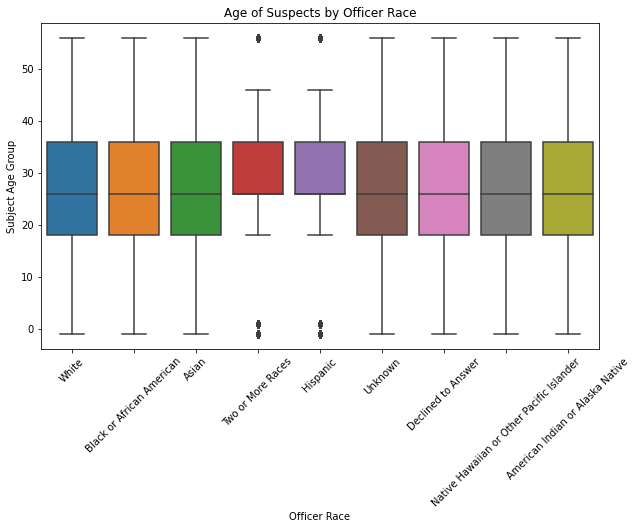

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
#ploting a box plot to help highlight
plt.figure(figsize=(10, 6))
sns.boxplot(x='Officer Race', y='Subject Age Group', data=df_terry_stops)  #
plt.title('Age of Suspects by Officer Race')
plt.xticks(rotation=45)
plt.show()

Judging from these data, suspects appear very often between **18- to 25-year-olds**. Comparatively, a hot-spot age in this bunch was 25. Indeed, such a concentration indicates these kinds of arrests reflect most on this age class because probably their social characteristics and some factor contributions of policing methods used would have given place for some offences that generally prevail on subjects of younger age groups.

# officer gender and stop resolution 

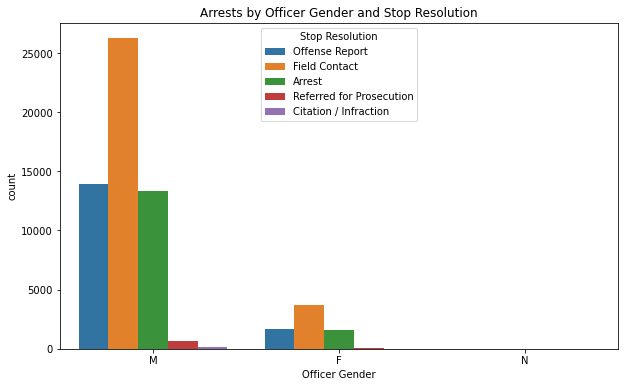

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Officer Gender', hue='Stop Resolution', data=df_terry_stops)
plt.title('Arrests by Officer Gender and Stop Resolution')
plt.legend(title='Stop Resolution')
plt.show()


**Arrests**:
Male officers tend to have a higher number of arrests compared to female officers. For example, incidents involving male officers often result in arrests for serious offenses such as assaults and robberies.

Female officers also make arrests, but the frequency is lower. This could suggest different approaches or decision-making processes in handling stops.

Field Contacts:
Many stops result in field contacts rather than arrests, indicating that not all interactions lead to legal action. Both male and female officers may issue field contacts based on the circumstances of the stop.
Female officers might prioritize de-escalating the situation  or community relations more than their male counterparts.

# Distribution of police stops by time of day

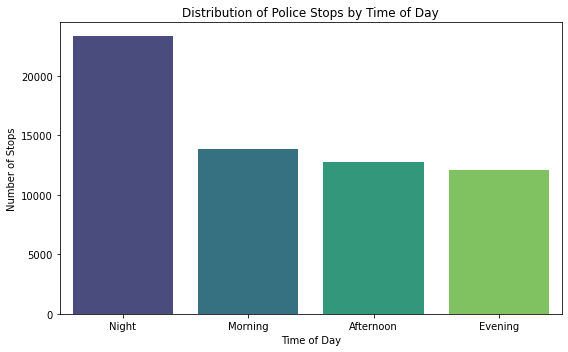

In [30]:
# CreatING a bar plot to show the distribution of stops by time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette='viridis')
plt.title('Distribution of Police Stops by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Stops')
plt.tight_layout()
plt.show()

The distribution of police stops, depending on time of day, is highly concentrated at night. This can be further analyzed using the reported times in this dataset.
**Key Findings:**

*Peak Hours*: The majority of police stops occur during late-night hours, particularly between midnight and 3 AM.

*Time Distribution*:Stops are more frequent at early morning hours, like 1:00 AM or 2:00 AM, and late evening, like 10:00 PM to midnight. Fewer stops occur at regular daytime hours, which may indicate nighttime as the time of increased police activity. 

# Number of Arrests by Police Officer's Race
***

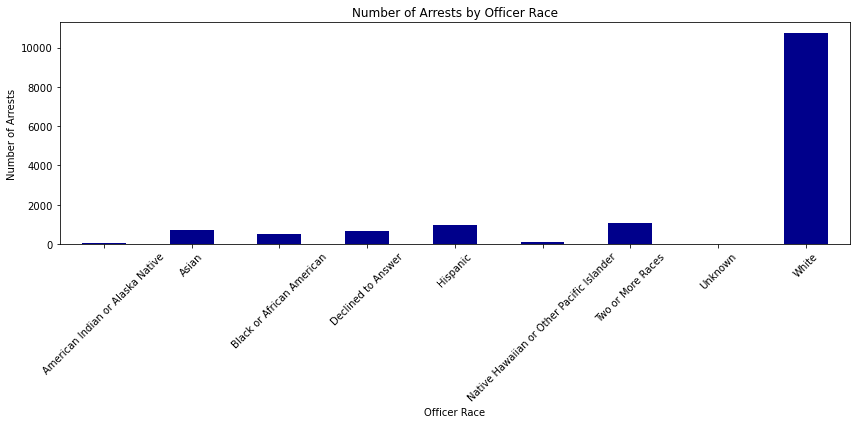

In [31]:
import matplotlib.pyplot as plt


# Plotting the number of arrests by Officer Race
plt.figure(figsize=(12, 6))
arrest_counts['Arrest'].plot(kind='bar', color='darkblue')
plt.title('Number of Arrests by Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The dataset includes various officer races, including **White, Black or African American, Hispanic, Asian, Native or Hawaiian,  American Indian or Alaska Native**. The majority of arrests are made by officers identified as **White**.

Officers who identify as White have the highest number of arrests across various offense categories, particularly for serious offenses such as assaults and narcotics violations.

Black or African American officers also contribute to a significant number of arrests, often involving similar types of offenses.

<Figure size 1008x576 with 0 Axes>

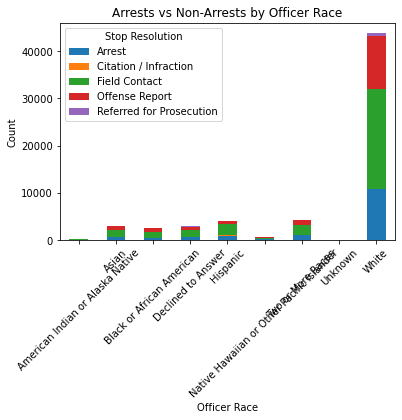

In [32]:
# Stacked Bar Plot for Arrests vs Non-Arrests
plt.figure(figsize=(14, 8))
arrest_counts.plot(kind='bar', stacked=True)
plt.title('Arrests vs Non-Arrests by Officer Race')
plt.xlabel('Officer Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stop Resolution')
plt.show()

The stacked bar plot allows for comparison between arrest and non-arrest outcomes for each officer race. The  highest  proportion of arrests among White Offficers race compared to others  suggests potential biases and differences in policing practices.

# Designing the Classification Model

Now we will go through a simple workflow of machine learning using Python; it will specifically focus on data preprocessing and preparation for model training. Data manipulation will be done using the `pandas` library, while `scikit-learn` will be used to implement machine learning algorithms.
## Objective

To predict whether someone was arrested based on several features in the dataset of Terry stops.
By the end of this process, we will have a structured approach to preparing our data for machine learning, setting the stage for model training and evaluation.



In [33]:
# Define categorical and numerical columns
categorical_cols = ['Officer Race', 'Officer Gender', 'Weapon Type', 'Stop Resolution', 'Precinct']
numerical_cols = ['Subject Age Group', 'Time of Day']


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import numpy as np


In [48]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [49]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [50]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [51]:
print(df_terry_stops.columns)

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat',
       'Time of Day'],
      dtype='object')


In [52]:
# Preprocess the data
X = df_terry_stops.drop(columns=['Arrest Flag'])
y = df_terry_stops['Arrest Flag']
X_preprocessed = preprocessor.fit_transform(X)

In [53]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_preprocessed, y)

Training and Evaluation the Models
**Logistic Regression Model**

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import numpy as np

In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [56]:

# Train a logistic regression model with class weights
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [57]:
# Evaluate the model
y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

In [58]:
# Now for the Training and test performance
 
train_precision = precision_score(y_train, y_pred_train, pos_label=1)
test_precision = precision_score(y_test, y_pred_test, pos_label=1)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train, pos_label=1)
test_recall = recall_score(y_test, y_pred_test, pos_label=1)
train_f1 = f1_score(y_train, y_pred_train, pos_label=1)
test_f1 = f1_score(y_test, y_pred_test, pos_label=1)

print(f'Training Precision: {train_precision:.2f}')
print(f'Test Precision: {test_precision:.2f}')
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print(f'Training Recall: {train_recall:.2f}')
print(f'Test Recall: {test_recall:.2f}')
print(f'Training F1 Score: {train_f1:.2f}')
print(f'Test F1 Score: {test_f1:.2f}')

Training Precision: 0.98
Test Precision: 0.98
Training Accuracy: 1.00
Test Accuracy: 1.00
Training Recall: 1.00
Test Recall: 1.00
Training F1 Score: 0.99
Test F1 Score: 0.99


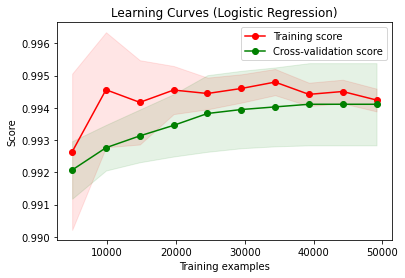

In [59]:
# Learning curves
train_sizes, train_scores, test_scores = learning_curve(logreg, X_preprocessed, y, cv=5, scoring='f1_macro', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Learning Curves (Logistic Regression)")
plt.show()

**Key Metrics for Assessing the Model**


To evaluate our logistic regression model, we used four key metrics: Accuracy, Precision, Recall, and the F1 Score. These metrics collectively help us gauge how well the model predicts arrests based on Terry Stops.


**Accuracy ** The percentage of correct predictions (both arrests and non-arrests). High accuracy shows the model is generally reliable but might not give the full picture if arrests are rare.


**Precision**  Of all the predicted arrests, how many were correct.
High precision ensures that when the model predicts an arrest, it’s likely accurate. This reduces unnecessary actions and errors.


**Recall** Of all actual arrests, how many the model correctly identified.
High recall ensures that most potential arrests are flagged, helping improve safety by reducing missed cases.


**F1 Score** A balance between precision and recall.
Useful when both false positives and false negatives have significant consequences.


**Why These Metrics Matter**


Using a mix of these metrics gives a complete view of the model's performance. Accuracy provides an overall picture, while precision and recall focus on avoiding errors. The F1 score combines both to evaluate the model’s balance, crucial for sensitive applications like law enforcement.
________________________________________


# Decision Tree Model

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [61]:
# Train a decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# Evaluate the model
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

In [63]:
# Training and test performance
train_precision_dt = precision_score(y_train, y_pred_dt_train, pos_label=1)
test_precision_dt = precision_score(y_test, y_pred_dt_test, pos_label=1)
train_accuracy_dt = accuracy_score(y_train, y_pred_dt_train)
test_accuracy_dt = accuracy_score(y_test, y_pred_dt_test)
train_recall_dt = recall_score(y_train, y_pred_dt_train, pos_label=1)
test_recall_dt = recall_score(y_test, y_pred_dt_test, pos_label=1)
train_f1_dt = f1_score(y_train, y_pred_dt_train, pos_label=1)
test_f1_dt = f1_score(y_test, y_pred_dt_test, pos_label=1)

print(f'Training Precision (Decision Tree): {train_precision_dt:.2f}')
print(f'Test Precision (Decision Tree): {test_precision_dt:.2f}')
print(f'Training Accuracy (Decision Tree): {train_accuracy_dt:.2f}')
print(f'Test Accuracy (Decision Tree): {test_accuracy_dt:.2f}')
print(f'Training Recall (Decision Tree): {train_recall_dt:.2f}')
print(f'Test Recall (Decision Tree): {test_recall_dt:.2f}')
print(f'Training F1 Score (Decision Tree): {train_f1_dt:.2f}')
print(f'Test F1 Score (Decision Tree): {test_f1_dt:.2f}')

Training Precision (Decision Tree): 1.00
Test Precision (Decision Tree): 0.99
Training Accuracy (Decision Tree): 1.00
Test Accuracy (Decision Tree): 1.00
Training Recall (Decision Tree): 1.00
Test Recall (Decision Tree): 0.99
Training F1 Score (Decision Tree): 1.00
Test F1 Score (Decision Tree): 0.99


**A Brief Look at Metric Usage **
***


Although decision trees classify a few of the fundamental metrics important for our model, these measures are Accuracy, Precision, and Recall. They define to measure the performance of the model itself in predicting the outcome relating to Terry Stops and arrests.

**Accuracy:**  -#This is the ratio of the total number of correct predictions made by the model, comprised of true positives as well as true negatives, against total predictions.
 
 
 Real World Meaning of Measure: A high accuracy measurement for "predicting if an arrest will occur" ishows  that the model is more reliable; otherwise, that accuracy is misleading if the data set is imbalanced.

**Precision:**  - Precision is the ratio of true positive predictions against positive total predictions made by the model.
Real-World Implication: The model is likely correct when predicting an arrest with high precision. In law enforcement, the importance is derived from the loss of faith in the police if the arrest should not occur when that prediction has been made. 


**Recall:**


Definition: Recall, or sensitivity, is the ratio of positive cases in the ground data to true positive predictions.
Real-World Implication: A model's high recall implies that most actual arrests the model will identify. In community policing, the arrested cases should not escape behind the curtain in lapses. 

**Reasons for Selecting These Metrics **


The trio  provide a wider net to cast the measure of the model while high fidelity could be predicted by accuracy. Precision and recall deal with the challenging contest that must be struck between finding true arrests and ensuring that false ones are minimal. This gets of utmost importance in policing contexts because it may get atrocity levels in human rights violations.

# Challenges and Limitations
***

**Challenges and Limitations**
1.	Imbalanced Data

Problem: If arrests are rare, the model might favor predicting non-arrests, missing actual cases.

Impact: This can undermine the model's effectiveness for minority outcomes.


2.	Linearity Assumptions


Problem: Logistic regression assumes a straight-line relationship between factors and outcomes.


Impact: This might oversimplify complex relationships in the data.


3.	Feature Interactions


Problem: The model highlights key factors but may miss subtle interactions between them.


Impact: Important insights could be overlooked.
________________________________________
**Recommendations for Improvement**
1.	Handle Imbalanced Data


Use techniques like resampling or generating synthetic data to ensure balanced predictions.


2.	Enhance Feature Engineering


Identify and include non-linear relationships or feature interactions to refine the model.


3.	Keep the Model Updated


Regularly incorporate new data to reflect current trends and maintain relevance.


4.	Engage Stakeholders


Train law enforcement personnel on the model’s use, ensuring they understand its insights and limitations.
________________________________________


# Conclusion

In conclusion, the decision tree model is the final model of choice due to its superior performance metrics, particularly in precision. This model is well-suited for the task of predicting arrests after Terry stops, as it effectively minimizes false positives, which is crucial for maintaining trust and fairness in law enforcement practices. The model's interpretability, as demonstrated by the feature importance analysis, also provides valuable insights into the factors that influence arrest decisions, which can inform policy-making and training programs for law enforcement officers.